In [1]:
!ls

Amazon top 50 Bestselling books .ipynb bestsellers with categories.csv
Credit_Card_Customers


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loding Data

In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Data Cleaning

### Duplicates 

In [5]:
#First try: there's no data with exactly the same information
duplicates = df.duplicated()
df[duplicates]

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [6]:
#Second try: the duplicated data has the same information except the year. For these time I'm not going to take it
# as duplicated data because a book can be in the top selling rating for several years
columns = ['Name','Author']
duplicates = df.duplicated(subset=columns,keep=False)
df[duplicates]

,Name,Author,User Rating,Reviews,Price,Year,Genre
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
...,...,...,...,...,...,...,...
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# Data Treatment

### Colapsing Data into Categories 

In [7]:
ranges=[3,4,5]
group_names = ['3-4','4-5']
df['Rating Group'] = pd.cut(df['User Rating'],bins=ranges,labels=group_names)
df[['User Rating','Rating Group']]

,User Rating,Rating Group
0,4.7,4-5
1,4.6,4-5
2,4.7,4-5
3,4.7,4-5
4,4.8,4-5
...,...,...
545,4.9,4-5
546,4.7,4-5
547,4.7,4-5
548,4.7,4-5


In [8]:
def nums(df):
    if df['Genre']=='Fiction':
        return 1
    else:
        return 0

df['Classification']=df.apply(nums,axis=1)
df[['Genre','Classification']]

,Genre,Classification
0,Non Fiction,0
1,Fiction,1
2,Non Fiction,0
3,Fiction,1
4,Non Fiction,0
...,...,...
545,Fiction,1
546,Non Fiction,0
547,Non Fiction,0
548,Non Fiction,0


# Exploratory Data Analysis 

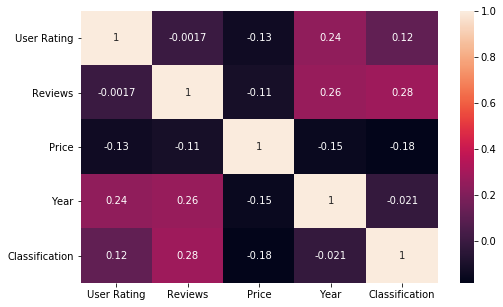

In [9]:
# Correlation Analysis
df.corr()
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True)

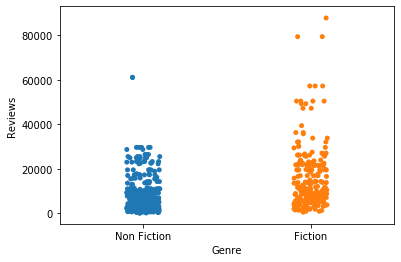

In [10]:
sns.stripplot(x='Genre',y='Reviews',data=df)

([<matplotlib.patches.Wedge at 0x7fb5a0595850>,
 [Text(0.2184495096398421, 1.078090817945368, 'Fiction'),
  Text(-0.21844950963984178, -1.078090817945368, 'Non Fiction')],
 [Text(0.11915427798536841, 0.5880495370611099, '43.6%'),
  Text(-0.11915427798536823, -0.5880495370611099, '56.4%')])

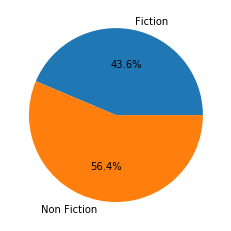

In [11]:
plt.pie(df['Genre'].value_counts().sort_values(),labels=df['Genre'].value_counts().sort_values().index,autopct='%1.1f%%')

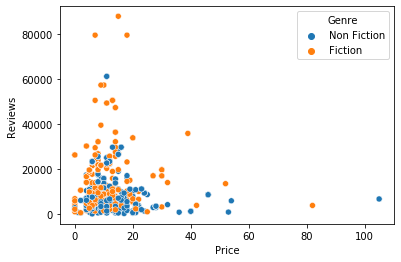

In [12]:
sns.scatterplot(x='Price',y='Reviews',hue='Genre',data=df)

In [13]:
# Which authors are still present in 2019 since 2009?

year19 = df[df['Year']==2019]
year09 = df[df['Year']==2009]

NC1=set(year19['Author'].unique()).difference(year09['Author'].unique())
new_authors = year19['Author'].isin(NC1)
authors=year19[~new_authors]['Author']

pd.DataFrame(df[df['Author'].isin(authors)].groupby(['Author','Genre'])['User Rating'].mean())


,,User Rating
Author,Genre,
Gary Chapman,Non Fiction,4.736364
Jeff Kinney,Fiction,4.800000
Mark R. Levin,Non Fiction,4.850000


<Figure size 1440x360 with 0 Axes>

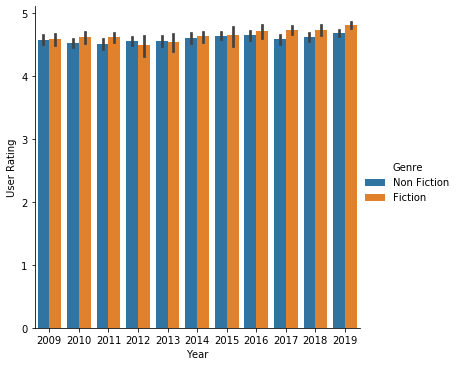

In [15]:
# Which genre of literature has a higher mean price?

plt.figure(figsize = (20,5))
sns.catplot(x='Year', y='User Rating', hue='Genre', data=df, kind='bar')

In [14]:
# Which genre of literature has a higher mean price?

pd.DataFrame(df.groupby(['Year','Genre'])['User Rating'].mean())

User Rating
Year Genre                   
2009 Fiction         4.591667
     Non Fiction     4.576923
2010 Fiction         4.615000
     Non Fiction     4.520000
2011 Fiction         4.619048
     Non Fiction     4.513793
2012 Fiction         4.495238
     Non Fiction     4.558621
2013 Fiction         4.545833
     Non Fiction     4.561538
2014 Fiction         4.631034
     Non Fiction     4.609524
2015 Fiction         4.652941
     Non Fiction     4.645455
2016 Fiction         4.715789
     Non Fiction     4.654839
2017 Fiction         4.737500
     Non Fiction     4.588462
2018 Fiction         4.738095
     Non Fiction     4.617241
2019 Fiction         4.820000
     Non Fiction     4.686667

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


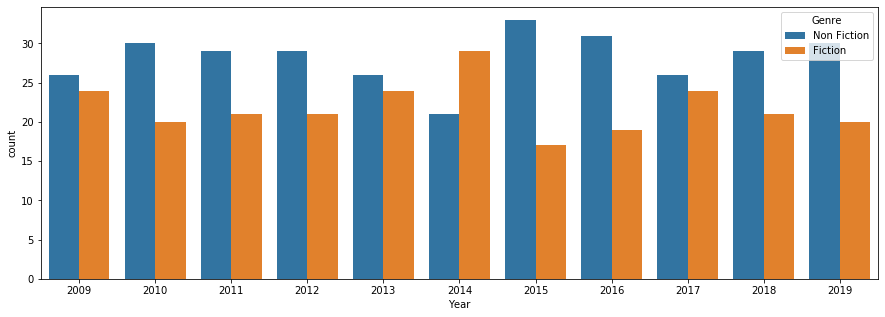

In [16]:
plt.figure(figsize = (15,5))
sns.countplot(df['Year'],hue=df['Genre'])

Text(0.5, 1.0, 'Top 10 Authors with Max BestSeller Books')

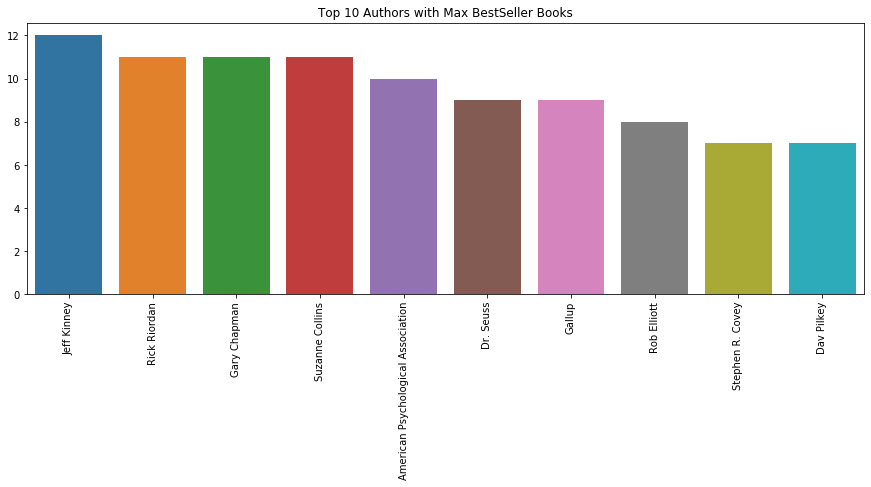

In [17]:
plt.figure(figsize = (15,5))
sns.barplot(x = df['Author'].value_counts().head(10).index,
            y = df['Author'].value_counts().head(10).values,
            data=df)
plt.xticks(rotation=90)
plt.title('Top 10 Authors with Max BestSeller Books')

In [18]:
df['Author'].value_counts().nlargest(10)

Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Dav Pilkey                             7
Name: Author, dtype: int64

Text(0.5, 1.0, 'Top 5 Authors with the most expensive Books')

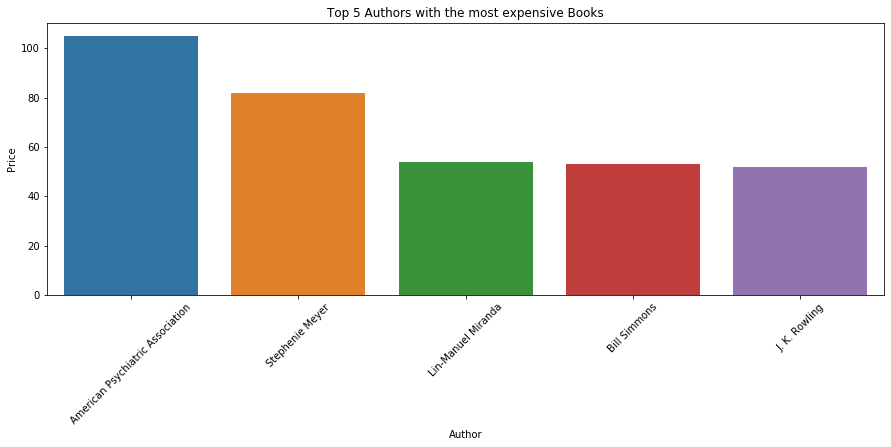

In [124]:
plt.figure(figsize = (15,5))
#plt.bar(df.iloc[df['Price'].nlargest(6).index]['Author'],
        #df.iloc[df['Price'].nlargest(6).index]['Price'])

sns.barplot(x =df.iloc[df['Price'].nlargest(6).index]['Author'],
            y =df.iloc[df['Price'].nlargest(6).index]['Price'],
            data=df)
plt.xticks(rotation=45)
plt.title('Top 5 Authors with the most expensive Books')

In [128]:
df.iloc[df['Price'].nlargest(6).index][['Author','Name','Price']]

,Author,Name,Price
69,American Psychiatric Association,Diagnostic and Statistical Manual of Mental Di...,105
70,American Psychiatric Association,Diagnostic and Statistical Manual of Mental Di...,105
473,Stephenie Meyer,The Twilight Saga Collection,82
151,Lin-Manuel Miranda,Hamilton: The Revolution,54
346,Bill Simmons,The Book of Basketball: The NBA According to T...,53
159,J. K. Rowling,Harry Potter Paperback Box Set (Books 1-7),52


Text(0, 0.5, 'Total number of views')

<Figure size 1080x360 with 0 Axes>

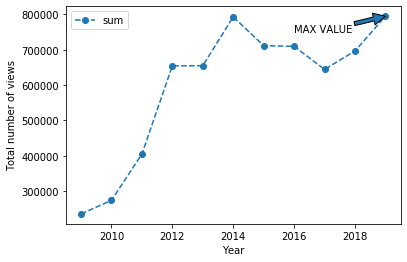

In [123]:
#How Does the number of reviews has been increasing along the years?

plt.figure(figsize=(15,5))
df.groupby('Year')['Reviews'].agg(['sum']).plot(marker='o',linestyle='--')
plt.annotate("MAX VALUE",xy=(2019,794917),xytext=(2016,750000),arrowprops={})
plt.ylabel('Total number of views')

In [103]:
df.groupby('Year')['Reviews'].agg(['count','sum'])

,count,sum
Year,,
2009,50,235506
2010,50,273981
2011,50,405041
2012,50,654546
2013,50,654907
2014,50,792997
2015,50,711669
2016,50,709800
2017,50,644420


# Usupervised Learning

### K-means  Clustering

In [19]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(np.array(df['Price']).reshape(-1, 1))
labels=model.predict(np.array(df['Price']).reshape(-1, 1))
print(model.inertia_)

15128.093865484112


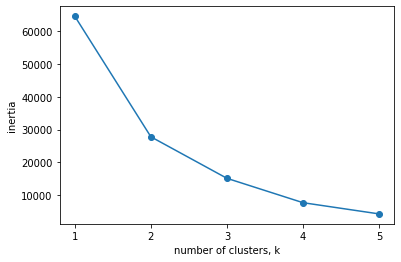

In [20]:
#How many clusters?

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(np.array(df['Price']).reshape(-1, 1))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [21]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(np.array(df['Price']).reshape(-1, 1))

# Create a DataFrame with labels and varieties as columns: df
ct_frame = pd.DataFrame({'labels': labels, 'Genre': np.array(df['Genre'])})

# Create crosstab: ct
ct = pd.crosstab(ct_frame['labels'],ct_frame['Genre'])

# Display ct
print(ct)

Genre   Fiction  Non Fiction
labels                      
0           171          157
1             4           20
2            65          133


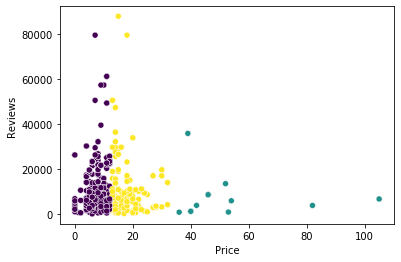

In [22]:
sns.scatterplot(x='Price',y='Reviews',data=df,c=labels)

In [23]:
# Now using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Kmeans = KMeans(n_clusters=3)

from sklearn.pipeline  import make_pipeline
pipeline = make_pipeline(scaler,Kmeans)
pipeline.fit(np.array(df['Price']).reshape(-1, 1))

# Calculate the cluster labels: labels
labels1 = pipeline.predict(np.array(df['Price']).reshape(-1, 1))

# Create a DataFrame with labels and species as columns: df
ct_frame_scaled = pd.DataFrame({'labels':labels1,'Genre':np.array(df['Genre'])})

# Create crosstab: ct
ct_scaled = pd.crosstab(ct_frame_scaled['labels'],ct_frame_scaled['Genre'])

# Display ct
print(ct_scaled)

Genre   Fiction  Non Fiction
labels                      
0            65          133
1             4           20
2           171          157


### Dendogram 

In [24]:
from scipy.cluster.hierarchy import linkage,dendogram
samples=np.array(df['Reviews'])
author_names = np.array(df['Author'])
mergins = linkage(samples,method='complete')
dendogram(mergins,labels=author_names,leaf_rotation=90,leaf_font_size=6)

ImportError: cannot import name 'dendogram' from 'scipy.cluster.hierarchy' (/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/scipy/cluster/hierarchy.py)

### t-SNE 

/Users/Oliver/opt/anaconda3/envs/Datascience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


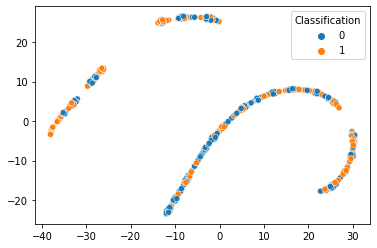

In [25]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=150)
samples=np.array(df['Reviews']).reshape(-1,1)
transformed = model.fit_transform(samples)
xs=transformed[:,0]
ys=transformed[:,1]
sns.scatterplot(xs,ys,hue='Classification',data=df)